**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"                
 [2] "hclust.col.annotation.prepare.chipseq_full.only.rds"                   
 [3] "hclust.col.annotation.test_chrX.chipseq_full.only.rds"                 
 [4] "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"                
 [5] "hclust.row.annotation.prepare.chipseq_full.only.rds"                   
 [6] "hclust.row.annotation.test_chrX.chipseq_full.only.rds"                 
 [7] "matrix.annotation.chipseq_flagship.tsv"                                
 [8] "matrix.annotation.chipseq_full.tsv"                                    
 [9] "matrix.annotation.chipseq_histone.tsv"                                 
[10] "matrix.annotation.chipseq_subset.tsv"                                  
[11] "matrix.annotation.fcc_peak_call.tsv"                                   
[12] "matrix.annotation.genome_tss.tsv"                                      
[13] "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"         

## Import data

In [8]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.umap.n_neighbors_70.annotation.prepare.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_umap = dat
fun_display_table(head(dat, 3))

Region,UMAP1,UMAP2
chr1:10038-10405,6.157586,-29.35985
chr1:16025-16338,-26.393824,-10.66996
chr1:17288-17689,6.953338,-29.49554


In [4]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, "summary")
#txt_fname  = "result.coverage.zscore.share.tsv"
#txt_fname  = "result.coverage.zscore.total.tsv"
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_score_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [7]:
dat = dat_score_fcc
res = table(dat$Assay_Type)
print(res)

cat("===================================\n")
res = table(dat$Assay_Type, dat$Assay_Group)
print(res)

cat("===================================\n")
res = table(dat$Assay_Type, dat$Assay_Label)
print(res)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
        150040          72743            941          61478            823 
        WSTARR 
        146480 
                
                 ASTARR_KS91 CRISPRi-Growth CRISPRi-HCRFF  LMPRA  TMPRA WSTARR
  ASTARR              150040              0             0      0      0      0
  CRISPRi-Growth           0          72743             0      0      0      0
  CRISPRi-HCRFF            0              0           941      0      0      0
  LMPRA                    0              0             0  61478      0      0
  TMPRA                    0              0             0      0    823      0
  WSTARR                   0              0             0      0      0 146480
                
                 ATAC-STARR CRISPRi-Growth CRISPRi-HCR FlowFISH Lenti-MPRA
  ASTARR             150040              0                    0          0
  CRISPRi-Growth          0          72743                    0          0
  C

In [10]:
df1 = dat_score_fcc
df2 = dat_region_umap

dat = dplyr::left_join(df1, df2, by = "Region")

dat_region_viz = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,UMAP1,UMAP2
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,-27.12563,-9.386514
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,-28.50433,-8.349983
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,14.28114,-23.961100


In [19]:
vec_txt_color =  colorRampPalette(rev(brewer.pal(10, "RdYlBu")))
theme_color   = scale_colour_gradientn(colours = vec_txt_color(100), limits=c(-2, 2))

In [20]:
vec_txt_assay = c(
    "ASTARR", "LMPRA", "CRISPRi-Growth",
    "WSTARR", "TMPRA", "CRISPRi-HCRFF"
)

lst = lapply(vec_txt_assay, function(txt_assay){
    dat = dat_region_viz
    dat = dat %>% dplyr::filter(Assay_Type == txt_assay) %>% na.omit
    txt = unique(dat$Assay_Label)
    
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2, color=Score)) + 
        geom_point(size = 0.5) + 
        labs(title = txt) +
        theme_cowplot() +
        background_grid() +
        theme_color
    return(gpt)
})

lst_gpt = lst

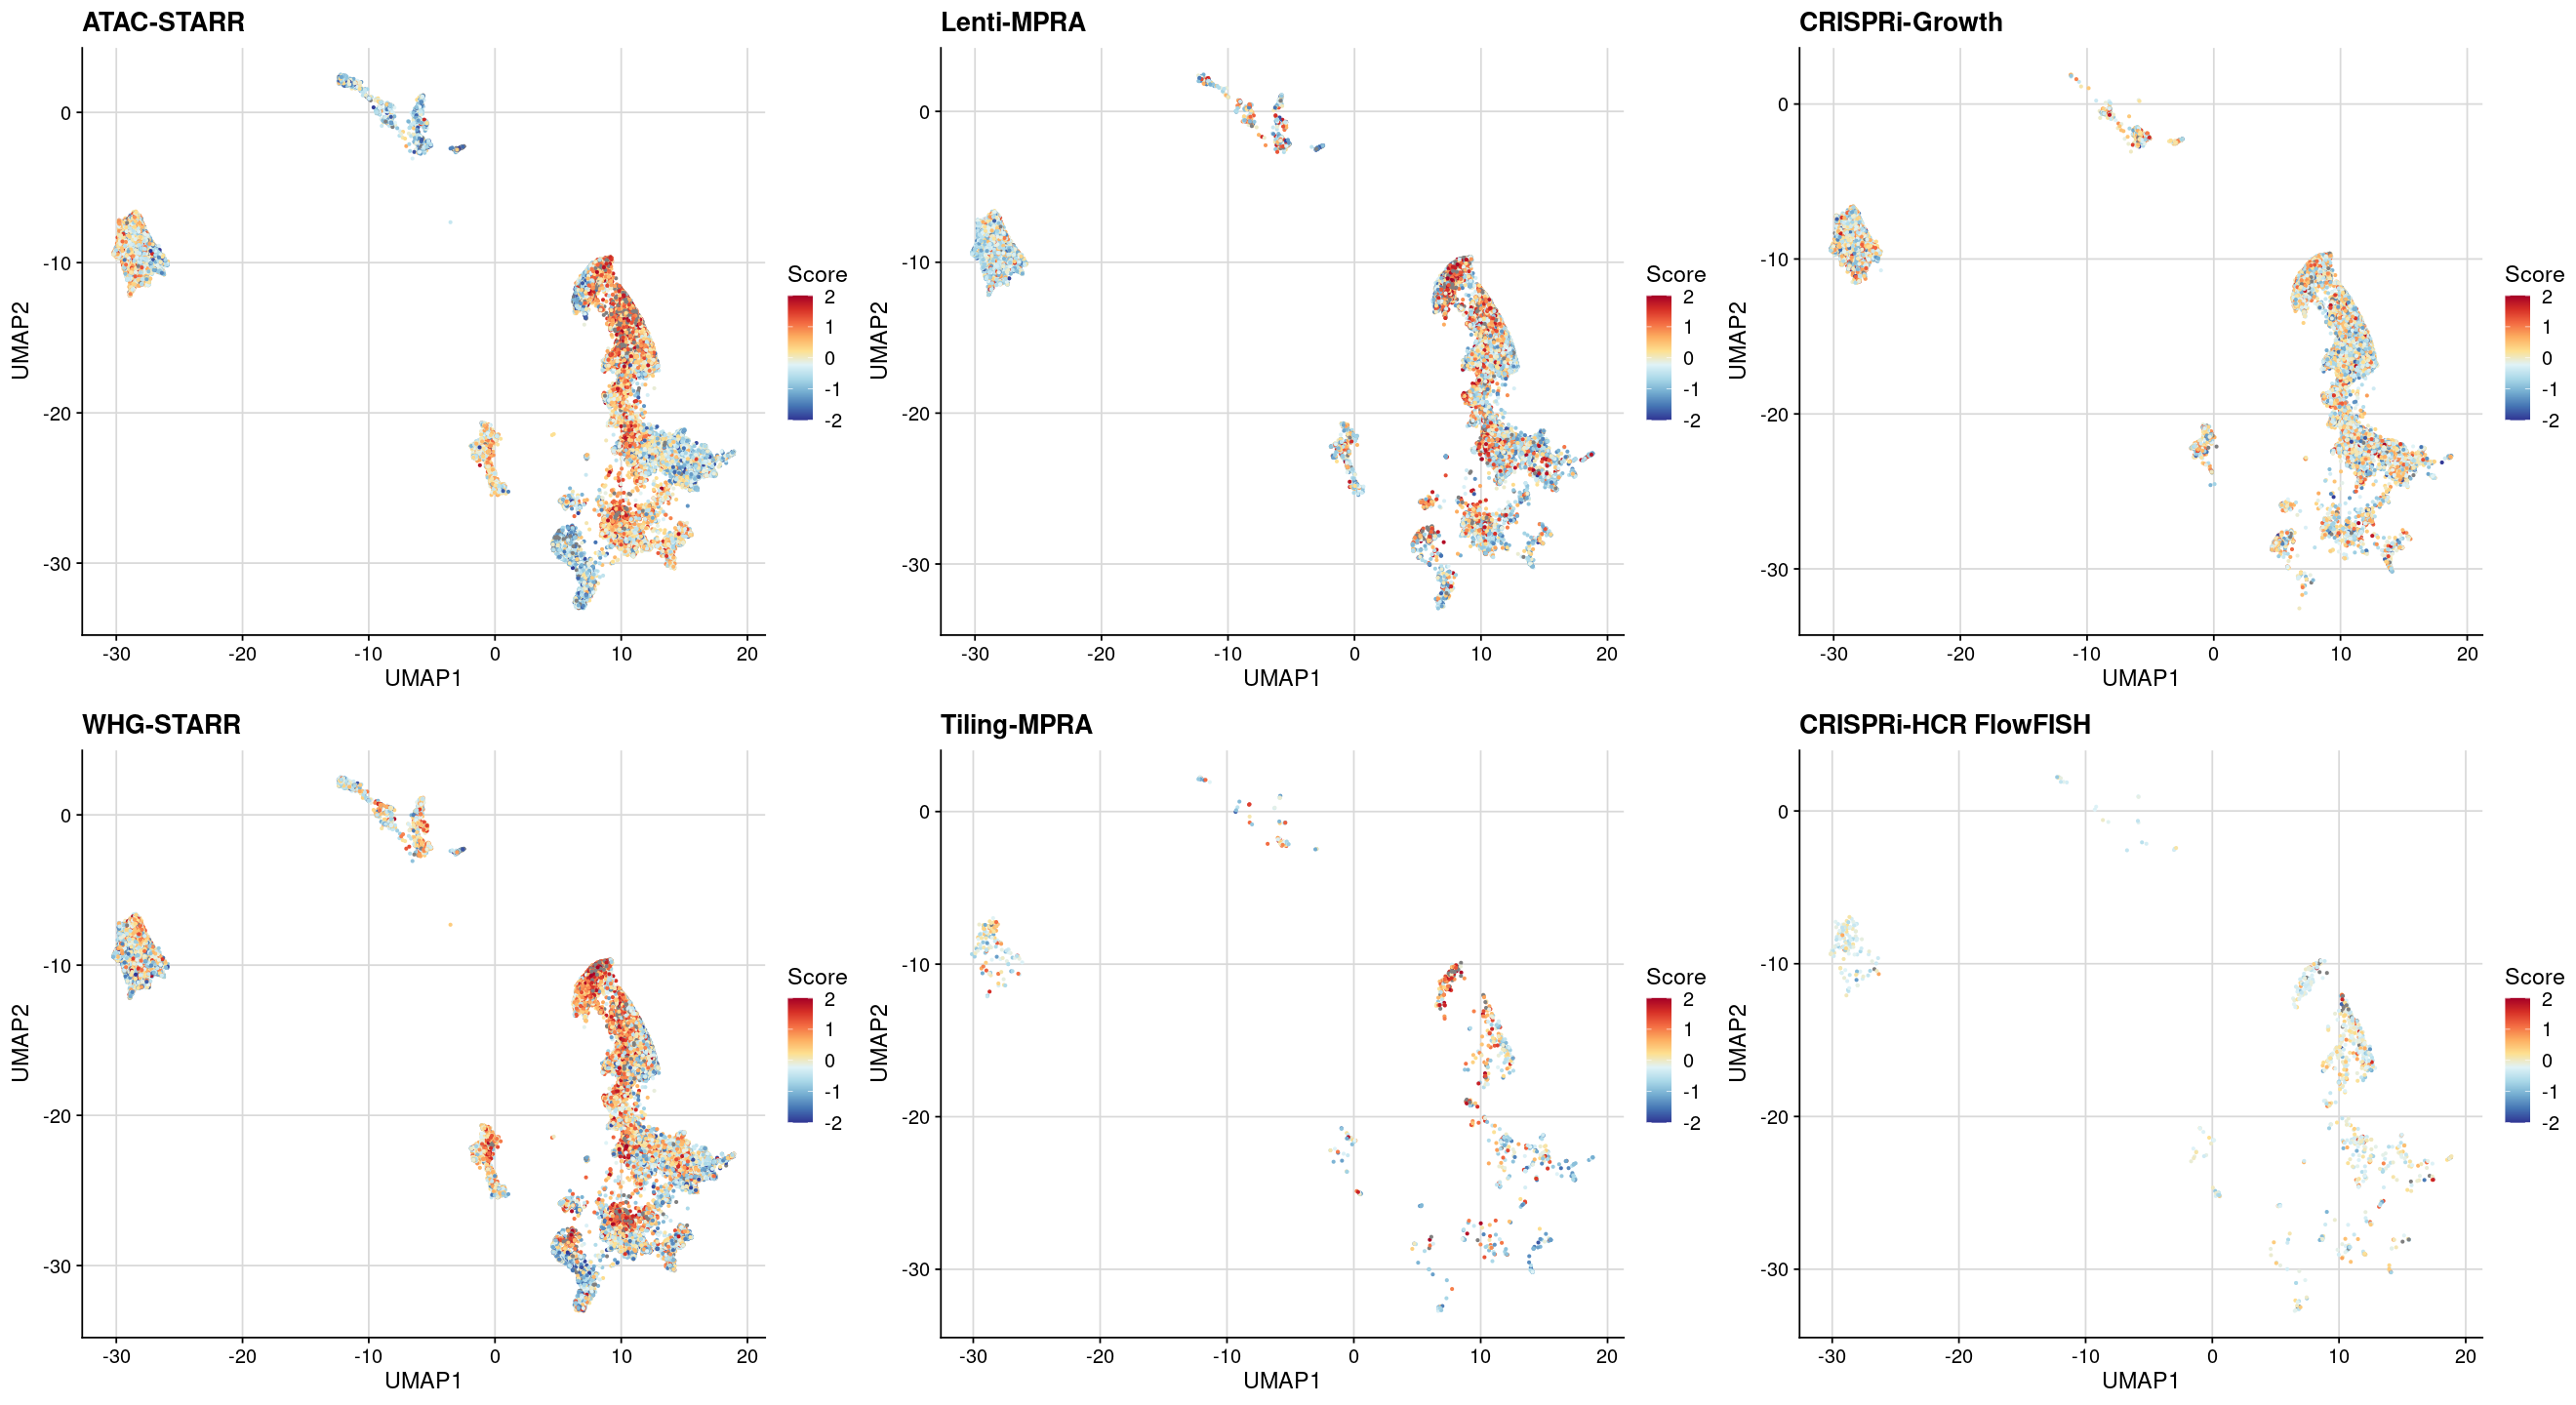

In [21]:
options(repr.plot.height=12, repr.plot.width=22)
plot_grid(plotlist = lst_gpt, nrow=2, ncol=3)